In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np

In [4]:
%aimport optimize
%aimport utils

/u/faghri/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/nobackup_b/faghri/under_convnet/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/nobackup_b/faghri/under_convnet/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/nobackup_b/faghri/under_convnet/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<ca

In [5]:
model_name = 'caffenet'
layer = 'fc7'
net = utils.init_model(model_name)

In [6]:
src_fname = 'val_13.JPEG'
guide_fname = 'val_23.JPEG'
src = utils.read_image_rgb(src_fname, net)
guide = utils.read_image_rgb(guide_fname, net)

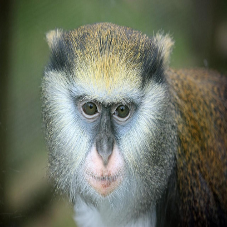

In [7]:
utils.showarray_noproc(src)

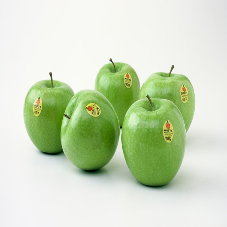

In [8]:
utils.showarray_noproc(guide)

In [9]:
iter_n=2000
max_thres=10.
ad, bc, cd = optimize.optimize_single(src_fname, guide_fname, model_name, layer, iter_n, max_thres, net)

Objective: relu
154.666
139.729
104.452
96.7626
90.5385
83.5255
78.846
73.6942
68.8468
64.4601
61.09
57.8258
55.1865
53.3663
51.7436
49.8535
48.3011
47.1342
46.0856
44.4782
42.7941
41.5132
40.2608
38.9394
37.5648
36.5281
35.5768
34.4734
33.1442
31.8638
30.9149
30.1848
29.6057
28.6831
27.8356
27.122
26.517
25.9294
25.282
24.5266
23.9754
23.5653
23.2355
22.7237
22.3462
22.047
21.7849
21.4728
21.1842
20.9565
20.6591
20.3529
20.0507
19.7705
19.5967
19.4452
19.2621
19.0555
18.9102
18.738
18.5608
18.3872
18.2639
18.1246
17.9815
17.8667
17.743
17.5993
17.5017
17.4274
17.2833
17.164
17.0414
16.9176
16.7881
16.6787
16.5969
16.4983
16.3929
16.2769
16.185
16.1155
16.0027
15.9075
15.8106
15.7063
15.6224
15.5454
15.4749
15.3729
15.273
15.1883
15.106
15.0212
14.9662
14.9181
14.8354
14.7682
14.703
14.6242
14.565
14.5225
14.4349
14.3521
14.2857
14.2214
14.1472
14.0849
14.0201
13.9497
13.8958
13.8477
13.8085
13.758
13.6998
13.6415
13.5919
13.5395
13.4844
13.4387
13.3992
13.3445
13.3034
13.2652
13.234
1

In [10]:
diff = ad - src
print np.max(np.abs(diff))

10.0


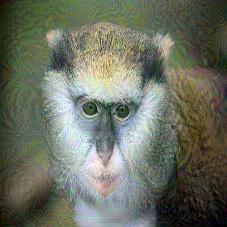

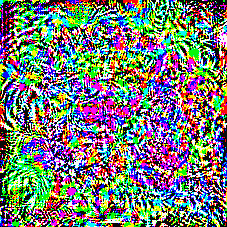

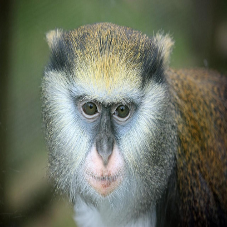

In [11]:
utils.showarray_noproc(ad)
utils.showarray_noproc(diff)
utils.showarray_noproc(src)

In [12]:
proc_src = utils.preprocess(net, src)
proc_guide = utils.preprocess(net, guide)

f_src = utils.extract_feat(net, proc_src, layer)
f_guide = utils.extract_feat(net, proc_guide, layer)
print f_src.shape

diff=(f_src - f_guide).flatten()
print "Initial euclidean distance: %.4f" % (np.dot(diff, diff)**.5)

proc_ad = utils.preprocess(net, ad)
f_ad = utils.extract_feat(net, proc_ad, layer)
diff=(f_ad - f_guide).flatten()
print "Final euclidean distance: %.4f" % (np.dot(diff, diff)**.5)

(4096,)
Initial euclidean distance: 154.6660
Final euclidean distance: 7.8878
